In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# READ, DISPLAY, SHAPE IMAGE

(540, 956, 3)

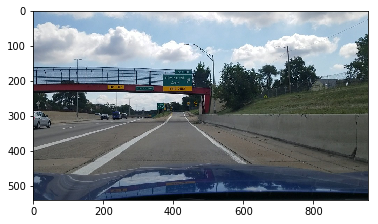

In [4]:
image=mpimg.imread("new_test_image_3.jpg")
plt.imshow(image)
image.shape

# CONVERT TO GRAY IMAGE

In [21]:
image_g=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray Image', image_g)
cv2.waitKey()
cv2.destroyAllWindows()

# GAUSIAN BLURRING AND CANNY

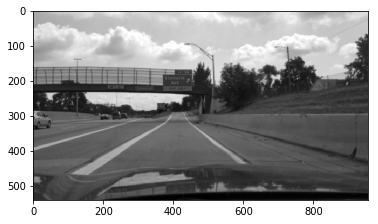

In [10]:
image_b=cv2.GaussianBlur(image_g,(7,7),0)
plt.imshow(image_b, cmap='gray')

# CANNY

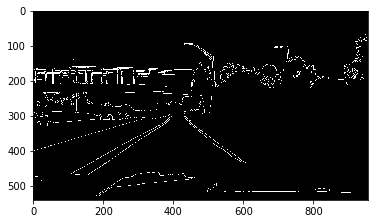

In [11]:
threshold_low=10
threshold_high=200

image_canny=cv2.Canny(image_b,threshold_low, threshold_high)
plt.imshow(image_canny, cmap='gray')

# DEFINE THE REGION OF INTEREST(GAUSSIAN)

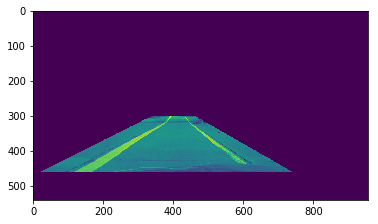

In [20]:
# visualize the region of interest
vertices = np.array([[(20,460),(340, 300), (460, 300), (740,460)]], dtype=np.int32)
mask=np.zeros_like(image_g)
cv2.fillPoly(mask,vertices,255)
masked_image=cv2.bitwise_and(image_g,mask)
plt.figure()
plt.imshow(masked_image)

In [15]:
vertices

array([[[ 20, 460],
        [340, 300],
        [460, 300],
        [740, 460]]], dtype=int32)

In [17]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
mask.shape

(540, 956)

# REGION OF INTEREST(CANNY)

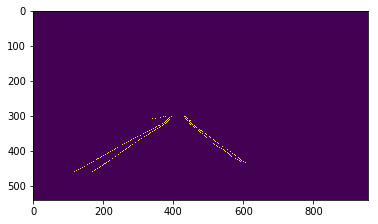

In [23]:
masked_image=cv2.bitwise_and(image_canny,mask)
plt.figure()
plt.imshow(masked_image)

# HOUGH LINE DETECTION AND TRANSFORM FUNCTION

In [50]:
rho =2 #distance resolution and function
theta=np.pi/180 #angular resolution in radians
threshold= 40 #minumum number of votes
min_line_len= 100 # minimum number of pixels marking a lane
max_line_gap= 50 # maximum gap in pixels defining the same line
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

line_image=np.zeros((masked_image.shape[0], masked_image.shape[1],3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)
lines

array([[[169, 460, 387, 313]],

       [[142, 447, 284, 366]],

       [[423, 304, 608, 433]],

       [[418, 303, 576, 422]],

       [[270, 390, 378, 322]],

       [[153, 442, 294, 361]],

       [[227, 422, 369, 323]],

       [[480, 342, 592, 423]]], dtype=int32)

In [51]:
print(lines[:5]);print('\n'); lines.shape

[[[169 460 387 313]]

 [[142 447 284 366]]

 [[423 304 608 433]]

 [[418 303 576 422]]

 [[270 390 378 322]]]




(8, 1, 4)

In [52]:
line_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [54]:
α = 1
β = 1
γ = 0    

# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
Image_with_lines = cv2.addWeighted(image, α, line_image, β, γ)

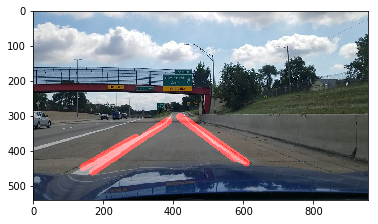

In [55]:
plt.figure()
plt.imshow(Image_with_lines)